## Lab 07 - Data preprocessing II
Name: Dempsey Wade 

Class: CSCI 349 - Intro to Data Mining 

Semester: 2019SP 

Instructor: Brian King

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 1) [P] Create a Python function called process_FAA_hourly_data that takes a filename as a string, and returns a completely processed pandas data frame, ready for analysis. It should do everything that the previous lab did to clean the file, including converting all numeric variables to their simplest numeric types, and converting the date/time stamp (first variable) to a pandas DatestampIndex, which becomes the actual index for the data frame. It should drop the date time variable after moving it to become the index.

### You completed this functionality in the last lab. (The last lab also had you create a new categorical variable called "Quarter". Do not include that functionality in this function.) Just copy over those important statements for processing FAA hourly files to cleaned data frames.

In [2]:
def process_FAA_hourly_data(filename):
    #File path automatically goes into my data folder
    df_temps = pd.DataFrame(pd.read_csv('/Users/dwade/directory/csci349_2019sp/data/' + filename + '.csv', skiprows = 16))
    del df_temps["Unnamed: 13"]
    df_temps.set_index(['Date/Time (GMT)'], inplace = True)
    df_temps = df_temps.drop('Date/Time (GMT)')
    df_temps.reset_index(level = 0, inplace = True)
    columns = df_temps.columns.drop('Date/Time (GMT)')
    df_temps[columns] = df_temps[columns].apply(pd.to_numeric, errors = 'coerce', downcast = 'float')
    df_temps.set_index(pd.to_datetime(df_temps['Date/Time (GMT)']), inplace = True)
    df_temps = df_temps.drop(['Date/Time (GMT)'], axis = 1)
    return df_temps

### 2) [P] Use your new function to read in the KIPT data file you downloaded in the last lab. Output the results of info() and describe() to confirm you read it in correctly.

In [3]:
df_temps = process_FAA_hourly_data('faa_hourly-KIPT_20180101-20181231')
df_temps.info()
df_temps.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8693 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Number of Observations (n/a)   8693 non-null   float32
 1   Average Temp (F)               8687 non-null   float32
 2   Max Temp (F)                   8687 non-null   float32
 3   Min Temp (F)                   8687 non-null   float32
 4   Average Dewpoint Temp (F)      8687 non-null   float32
 5   1 Hour Precip (in)             1730 non-null   float32
 6   Max Wind Gust (mph)            1044 non-null   float32
 7   Average Relative Humidity (%)  8425 non-null   float32
 8   Average Wind Speed (mph)       8680 non-null   float32
 9   Average Station Pressure (mb)  8675 non-null   float32
 10  Average Wind Direction (deg)   8279 non-null   float32
 11  Max Wind Speed (mph)           8680 non-null   float32
dtypes: float32(1

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
count,8693.000000,8687.000000,8687.000000,8687.000000,8687.000000,1730.000000,1044.000000,8425.000000,8680.000000,8675.000000,8279.000000,8680.000000
mean,1.399747,51.752987,51.847435,51.662914,41.679428,0.040006,23.856617,71.532364,6.033965,1017.902222,153.428192,6.325367
std,0.903275,19.336796,19.362728,19.315928,20.122921,0.088109,5.003509,19.806757,5.022885,7.417259,123.157219,5.109391
min,1.000000,-2.900000,-2.900000,-2.900000,-11.000000,0.000000,16.100000,9.000000,0.000000,986.000000,0.000000,0.000000
25%,1.000000,36.000000,36.000000,36.000000,25.000000,0.000000,20.700001,57.000000,1.750000,1013.200012,2.085000,3.500000
50%,1.000000,51.099998,51.099998,50.000000,42.099998,0.010000,23.000000,75.000000,5.800000,1017.900024,133.330002,5.800000
75%,1.000000,69.099998,69.099998,69.099998,60.099998,0.040000,26.500000,89.000000,9.200000,1022.400024,270.000000,9.200000
max,8.000000,96.099998,96.099998,96.099998,76.449997,1.480000,54.099998,100.000000,35.700001,1043.699951,360.000000,36.799999


### 3) [P] Read in the file FAA_PA_stations.csv provided on Moodle. It's not actually a comma separated file, but a tab separated file. Store the data frame as stations.

In [4]:
stations = pd.DataFrame(pd.read_csv('/Users/dwade/directory/csci349_2019sp/data/FAA_PA_stations.csv'))

### 4) [P] Examine the data frame (show the first few records). In particular, pay close attention to the variables Lat and Lon. These represent the precise latitude and longitude geolocation for the weather station. Then, create a new variable in stations that stores the distance of every station in PA to Williamsport (KIPT). Use a standard Euclidean distance calculation (over latitude and longitude) to compute the distance between the stations. As a reminder, Euclidean distance between two points defined by (x1, y1) and (x2, y2) is:

In [5]:
stations.head()

,ID,Name,County,State,Lat,Lon,Elevation (feet)
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0


In [6]:
z = stations[stations['ID'] == 'KIPT']

def distance(y, x):
    return (((z['Lat'] - x['Lat'])**2 + (z['Lon'] - x['Lon'])**2)**(1/2))

stations['Distance'] = stations.apply(lambda x: distance(stations, x), axis = 1)

In [7]:
stations['Distance'].head(5)

0    1.593267
1    1.691892
2    3.501685
3    1.808867
4    3.066235
Name: Distance, dtype: float64

### 5) [P] Output the top 5 stations that are closest to KIPT. (The closest one should be to itself!) The stations should be listed in order of increasing distance from KIPT.

In [8]:
stations.sort_values('Distance', ascending = True).head(5)

,ID,Name,County,State,Lat,Lon,Elevation (feet),Distance
30,KIPT,WILLIAMSPORT,LYCOMING,PA,41.24,-76.92,520.0,0.000000
27,KSEG,SELINSGROVE,SNYDER,PA,40.82,-76.86,444.0,0.424264
18,KMUI,MUIR ARMY AIR FIELD,LEBANON,PA,40.43,-76.57,489.0,0.882383
28,KUNV,UNIVERSITY PARK,CENTRE,PA,40.85,-77.85,1240.0,1.008464
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0,1.022399


### 6) [P] Using your results, go back to the PSU climate website, and download the faa_hourly data for the same date ranges for the three closest stations to KIPT. Copy them into your data folder. Then, read in each data file into its own data frame using your function. You should have four data frames: df_kipt, and three other data frames representing the three closest stations.

In [9]:
df_kipt = process_FAA_hourly_data('faa_hourly-KIPT_20180101-20181231')
df_kseg = process_FAA_hourly_data('faa_hourly-KSEG_20180101-20181231')
df_kunv = process_FAA_hourly_data('faa_hourly-KUNV_20180101-20181231')
df_kmui = process_FAA_hourly_data('faa_hourly-KMUI_20180101-20181231')

### 7) [P] Create a function called get_missing_timestamps that takes a data frame of FAA hourly data, and returns a simple Python list of Timestamp objects representing all of the dates that are missing. (You completed some of this functionality in the previous lab. Now you are making it a useful function.) The design of the function is up to you. However, a forward thinking data scientist will make these functions as flexible as possible. (AND, a good software developer will NOT hardcode values for specific cases!)

In [10]:
def get_missing_timestamps(x, y):
    start = '2018-01-01 00:00am'
    end = '2018-12-31 11:00pm'
    lb = pd.date_range(start, end, freq = 'h')
    missing = lb[~lb.isin(x.index)]
    return missing
    
kipt_missing = get_missing_timestamps(df_kipt, 'Average Temp (F)')
kseg_missing = get_missing_timestamps(df_kseg, 'Average Temp (F)')
kunv_missing = get_missing_timestamps(df_kunv, 'Average Temp (F)')
kmui_missing = get_missing_timestamps(df_kmui, 'Average Temp (F)')

#I chose to make 'Average Temp (F) a parameter so my function isn't
#hardcoded. 

In [11]:
print(len(kipt_missing))

67


### 8) [P] Write the Python code that reports a list of timestamps that are included in each nearby station that KIPT is missing. (HINT: it will be far, far easier if you consider casting your list to a set, and using set methods.)

In [12]:
kipt_missing = set(kipt_missing)
kseg_missing = set(kseg_missing)
kunv_missing = set(kunv_missing)
kmui_missing = set(kmui_missing)

Now, your real task. Some instructor of yours (not mentioning any names) loves complete datasets. He gets freaked out when he sees missing data. He's also not a fan of noise. Noise be bad!

You're going to repair this data by filling in the best representative data from a nearby station. For the remainder of this exercise, we will focus on the average temperature attribute (column 1). And, at this point, you should be not only going for the most efficient code, but you are going to start doing more advanced analyses. So, when your output is not obvious or intuitive, please write markdown after your output is generated that explains your code, and interprets your results!

### 9) [P] Since we're going to focus on average temperature, create a new data frame called df_ave_temps that contains a the average temperature from all four stations. It should have a COMPLETE hourly date range for its index from the specified start date to finish date (i.e. you should have 365 * 24 rows.) If the dates are missing from the station you are copying from, then plug in a NaN value for that entry. Label your variables accordingly. You will use these data for the remainder of this work.

In [13]:
start = '2018-01-01 00:00am'
end = '2018-12-31 11:00pm'
lb = pd.date_range(start, end, freq = 'h')

In [14]:
df_ave_temps = pd.concat((df_kipt['Average Temp (F)'], df_kseg['Average Temp (F)'], df_kunv['Average Temp (F)'], df_kmui['Average Temp (F)']), axis = 1)
df_ave_temps.columns = ['KIPT', 'KSEG','KUNV','KMUI']
df_ave_temps.head()

,KIPT,KSEG,KUNV,KMUI
Date/Time (GMT),,,,
2018-01-01 00:00:00,10.0,-0.9,8.60,5.9
2018-01-01 01:00:00,8.1,-2.0,8.60,10.0
2018-01-01 02:00:00,7.0,-4.0,8.60,10.4
2018-01-01 03:00:00,3.9,-2.9,7.27,10.6
2018-01-01 04:00:00,9.0,-2.9,7.03,10.4


In [16]:
df_ave_temps.columns = ["KIPT", "KSEG", "KUNV", "KMUI"]
for column in df_ave_temps:
    missing_temps = get_missing_timestamps(df_ave_temps[column], 'Average Temp (F)')
    for y in missing_temps:
        #print(y)
        df_ave_temps[column].loc[y] = np.nan

### 10) [P] Report the dates that have missing data for all four stations, if any.

In [17]:
x = kipt_missing.intersection(kseg_missing)
x = x.intersection(kunv_missing)
x = x.intersection(kmui_missing)
print('There are ', len(x), 'dates missing in all 4 stations')

#37 same date missing in all 4 stations. 

There are  37 dates missing in all 4 stations


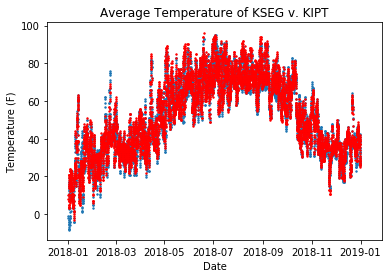

In [18]:
plt.scatter(df_kseg.index, df_kseg["Average Temp (F)"], s = 2)
plt.scatter(df_kipt.index, df_kipt["Average Temp (F)"], c = 'Red', s = 2)
plt.title("Average Temperature of KSEG v. KIPT")
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.show()

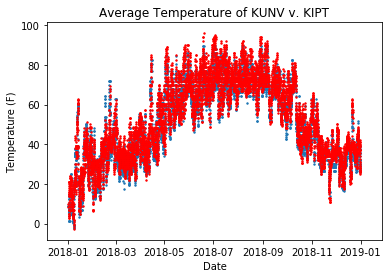

In [19]:
plt.scatter(df_kunv.index, df_kunv["Average Temp (F)"], s = 2)
plt.scatter(df_kipt.index, df_kipt["Average Temp (F)"], c = 'Red', s = 2)
plt.title("Average Temperature of KUNV v. KIPT")
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.show()

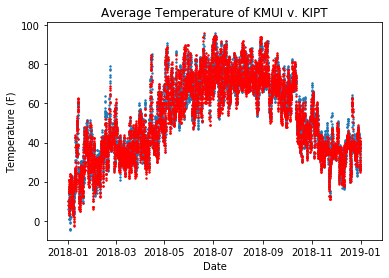

In [20]:
plt.scatter(df_kmui.index, df_kmui["Average Temp (F)"], s = 2)
plt.scatter(df_kipt.index, df_kipt["Average Temp (F)"], c = 'Red', s = 2)
plt.title("Average Temperature of KMUI v. KIPT")
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.show()

### 12) [P] The lines will largely overlap, as one would expect. Select one month of your choosing, and repeat the previous step for that month.

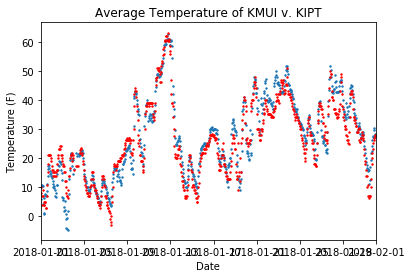

In [21]:
df_kmui_temp = df_kmui[df_kmui.index.month == 1]
df_kipt_temp = df_kipt[df_kipt.index.month == 1]

plt.scatter(df_kmui_temp.index, df_kmui_temp["Average Temp (F)"], s = 2)
plt.scatter(df_kipt_temp.index, df_kipt_temp["Average Temp (F)"], c = 'Red', s = 2)
plt.title("Average Temperature of KMUI v. KIPT")
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.xlim([pd.Timestamp(2018, 1, 1), pd.Timestamp(2018, 2, 1)])
plt.show()

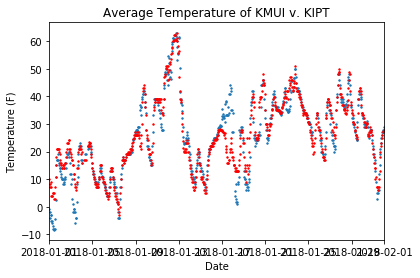

In [22]:
df_kseg_temp = df_kseg[df_kseg.index.month == 1]
df_kipt_temp = df_kipt[df_kipt.index.month == 1]

plt.scatter(df_kseg_temp.index, df_kseg_temp["Average Temp (F)"], s = 2)
plt.scatter(df_kipt_temp.index, df_kipt_temp["Average Temp (F)"], c = 'Red', s = 2)
plt.title("Average Temperature of KMUI v. KIPT")
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.xlim([pd.Timestamp(2018, 1, 1), pd.Timestamp(2018, 2, 1)])
plt.show()

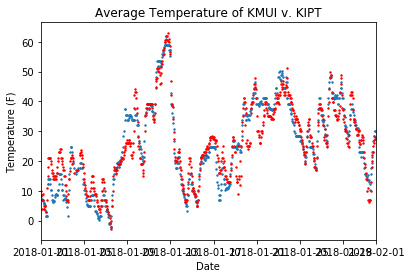

In [23]:
df_kunv_temp = df_kunv[df_kunv.index.month == 1]
df_kipt_temp = df_kipt[df_kipt.index.month == 1]

plt.scatter(df_kunv_temp.index, df_kunv_temp["Average Temp (F)"], s = 2)
plt.scatter(df_kipt_temp.index, df_kipt_temp["Average Temp (F)"], c = 'Red', s = 2)
plt.title("Average Temperature of KMUI v. KIPT")
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.xlim([pd.Timestamp(2018, 1, 1), pd.Timestamp(2018, 2, 1)])
plt.show()

### 13) [P] Report the number of NaN values that are shared between KIPT and each station you downloaded for average temperature. Remember, be careful how you compare values. Dates will not be in the same row index due to missing data (i.e. do not just iterate over rows using integers!) Write the code to generate the answer. Because you are focused on cleaning up average temperature, this could help you decide which station to use.

In [24]:
kseg_shared = kipt_missing.intersection(kseg_missing)
kunv_shared = kipt_missing.intersection(kunv_missing)
kmui_shared = kipt_missing.intersection(kmui_missing)

print(len(kseg_shared), 'shared between KIPT and KSEG')
print(len(kunv_shared), 'shared between KIPT and KUNV')
print(len(kmui_shared), 'shared between KIPT and KMUI')

64 shared between KIPT and KSEG
48 shared between KIPT and KUNV
47 shared between KIPT and KMUI


### 14) [P] Perhaps it's more important to select the station that has the most similar values. Write a function called compare_station that takes two Series objects, and computes the sum of the absolute value of the difference between each number in the vector. You should only sum the values that have valid values for both entries. Return the average of these absolute differences. Then, call compare_station on KIPT and each of the new station, but pass only the average temp vector from each station.

In [25]:
def compare_station(x, y):
    df_temp = pd.concat([x, y], axis = 1)
    df_temp.columns = ['x', 'y']
    dif = df_temp.apply(lambda s: abs(s['x'] - s['y']) if not np.isnan(s['x']) and not np.isnan(s['y']) else np.nan, axis = 1)
    return dif.mean()

dif_kseg = compare_station(df_ave_temps["KSEG"], df_ave_temps["KIPT"])
dif_kunv = compare_station(df_ave_temps["KUNV"], df_ave_temps["KIPT"]) 
dif_kmui = compare_station(df_ave_temps["KMUI"], df_ave_temps["KIPT"])   
print(dif_kseg)
print(dif_kunv)
print(dif_kmui)

1.8825645354992955
2.9841939331239584
2.754363204952439


### 15) [P] As we learned in class, you could compute a correlation coefficient between columns of data to determine similarity. Compute the correlation coefficient between the average temp of KIPT, and each of the other stations you downloaded. They should all be very close to 1, but not quite. What does this technique suggest which station is most similar?

In [26]:
df_ave_temps.corr()['KIPT']

KIPT    1.000000
KSEG    0.989221
KUNV    0.983036
KMUI    0.982717
Name: KIPT, dtype: float64

### 16) [M] Important question: Which station seems to be the best representative for KIPT? Why?

KSEG is most similiar to KIPT, with the highest correlation. 

### 17) [P] Create a new attribute called aveTempFixed in your KIPT data frame that keeps all of the original average temp data, but takes the readings from the closest station to replace in the NA values.

In [27]:
df_kipt['aveTempFixed'] = df_kipt["Average Temp (F)"].fillna(df_kmui["Average Temp (F)"])

### 18) [P] How many missing values did you fill in?

In [28]:
## 67 missing previously
print("I filled in", df_kipt["Average Temp (F)"].isna().sum()- df_kipt["aveTempFixed"].isna().sum(), "missing values")
## Updated the new value 

I filled in 6 missing values


### 19) [P] Create a new function called moving_ave that takes a Series of numbers and a window size, and returns a new vector that contains the moving average over the window size. For example:

moving_ave(pd.Series([5,10,3,7,8,9]),3)

NA, 6, 6.666667, 6, 8, NA
NOTE: Your function should center your data over the range, and fill the ends with NA values.

In [29]:
def moving_ave(series, window):
    return series.rolling(window, center = True).mean()

moving_ave(pd.Series([5, 10, 3, 7, 8, 9]), 3)

0         NaN
1    6.000000
2    6.666667
3    6.000000
4    8.000000
5         NaN
dtype: float64

### 20) Use your new function to smooth out your fixed average temp data. Call moving_ave with a moving average window size of 6, 12, and 24. Show the raw data and your three smoothed plots on one single plot. Interpret your results.

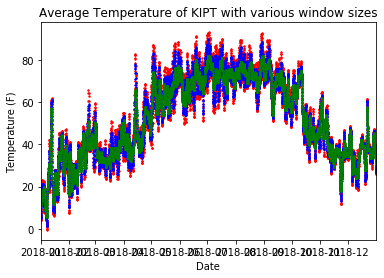

In [30]:
df_final1 = moving_ave(df_kipt['aveTempFixed'], 6)
plt.scatter(df_kipt.index, df_final1, s = 2, c = 'Red')
#plt.show()
df_final2 = moving_ave(df_kipt['aveTempFixed'], 12)
plt.scatter(df_kipt.index, df_final2, s = 2, c = 'Blue')
#plt.show()
df_final3 = moving_ave(df_kipt['aveTempFixed'], 24)
plt.scatter(df_kipt.index, df_final3, s = 2, c = 'Green')

plt.title("Average Temperature of KIPT with various window sizes")
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.xlim([pd.Timestamp(2018, 1, 1), pd.Timestamp(2018, 12, 31)])
plt.show()

It was easier to see on 3 seperate graphs, but the green dots are closer together than the red and blue dots. The smoothing function removes most dramatic vertical spikes in the graph and makes it easier to comprehend. 

As you can see in my final graph, all of the green dots (largest window size) are contained inside of the red and blue dots, because they are more centralized. 